In [1]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [62]:
#bring in the six packs
df_train = pd.read_csv('./data/etalab/train.csv', index_col=0)
df_train.shape

(97, 9)

In [58]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
longitude,79,0.814433
latitude,79,0.814433
surface_reelle_bati,5,0.051546
valeur_fonciere,0,0.000000
type_local,0,0.000000
surface_terrain,0,0.000000
nombre_pieces_principales,0,0.000000
date_mutation,0,0.000000
city,0,0.000000


In [64]:
#dealing with missing data
df_train = df_train.dropna(subset=['valeur_fonciere', 'nombre_pieces_principales', 'surface_reelle_bati'])
df_train = df_train.dropna(subset=['longitude', 'latitude'])
# df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index)
df_train = df_train.drop(df_train.loc[df_train['nombre_pieces_principales'] == 0].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

In [65]:
# #descriptive statistics summary
# df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train['valeur_fonciere'].describe()

count        16.000000
mean     177918.750000
std       66251.686457
min       51350.000000
25%      138125.000000
50%      193000.000000
75%      220000.000000
max      284850.000000
Name: valeur_fonciere, dtype: float64

In [66]:
df_train.head()

,city,date_mutation,latitude,longitude,nombre_pieces_principales,surface_reelle_bati,surface_terrain,type_local,valeur_fonciere
id,,,,,,,,,
0,Abbaretz,2016,47.535743,-1.534179,3.0,115.0,1803.0,Maison,160000.0
1,Aigrefeuille-sur-Maine,2018,47.080574,-1.405583,4.0,121.0,1076.0,Maison,284850.0
3,Aigrefeuille-sur-Maine,2016,47.082339,-1.405310,6.0,94.0,465.0,Maison,210000.0
13,Abbaretz,2017,47.547748,-1.532885,2.0,59.0,435.0,Maison,90000.0
24,Aigrefeuille-sur-Maine,2015,47.081358,-1.409346,4.0,88.0,432.0,Maison,150000.0


In [17]:
df_train.shape

(16, 9)

In [18]:
df_zero = df_train[df_train['valeur_fonciere'] == 0]
df_zero.size
# df_sorted = df_train.sort_values(by=['valeur_fonciere'], ascending=False)
df_sorted = df_train.sort_values(by=['valeur_fonciere'])
df_sorted.head()

,city,date_mutation,latitude,longitude,nombre_pieces_principales,surface_reelle_bati,surface_terrain,type_local,valeur_fonciere
id,,,,,,,,,
73,Abbaretz,2016,47.533186,-1.526672,3.0,96.0,1874.0,Maison,51350.0
13,Abbaretz,2017,47.547748,-1.532885,2.0,59.0,435.0,Maison,90000.0
61,Abbaretz,2014,47.567772,-1.510256,3.0,105.0,2168.0,Maison,95000.0
47,Abbaretz,2016,47.533210,-1.527500,3.0,114.0,270.0,Maison,102500.0
24,Aigrefeuille-sur-Maine,2015,47.081358,-1.409346,4.0,88.0,432.0,Maison,150000.0


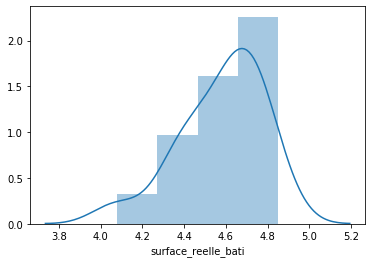

In [19]:
#histogram
df_train = df_train[df_train['surface_reelle_bati'] < 400]
df_train['surface_reelle_bati'] = np.log(df_train['surface_reelle_bati'])
# df_train['surface_reelle_bati'] = np.exp(df_train['surface_reelle_bati'])
sns.distplot(df_train['surface_reelle_bati']);

In [20]:
df_train['valeur_fonciere'].head() #just checking that there's no missing data missing...

id
0     160000.0
1     284850.0
3     210000.0
13     90000.0
24    150000.0
Name: valeur_fonciere, dtype: float64

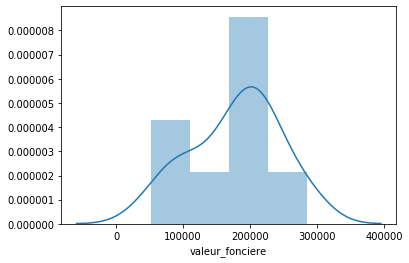

In [21]:
#histogram
df_train = df_train[df_train['valeur_fonciere'] < 1000000]
df_train = df_train[df_train['valeur_fonciere'] > 10000]
# df_train['valeur_fonciere'] = np.log(df_train['valeur_fonciere'])
sns.distplot(df_train['valeur_fonciere']);

In [22]:
#skewness and kurtosis
print("Skewness: %f" % df_train['valeur_fonciere'].skew())
print("Kurtosis: %f" % df_train['valeur_fonciere'].kurt())

Skewness: -0.357426
Kurtosis: -0.510451


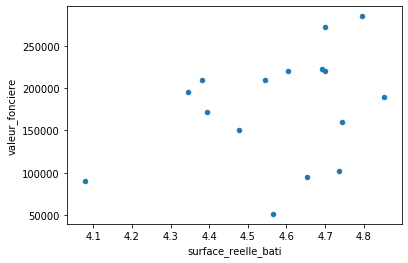

In [23]:
#scatter plot grlivarea/saleprice
var = 'surface_reelle_bati'
data = pd.concat([df_train['valeur_fonciere'], df_train[var]], axis=1)
# data.plot.scatter(x=var, y='valeur_fonciere', ylim=(0,1000000));
data.plot.scatter(x=var, y='valeur_fonciere');

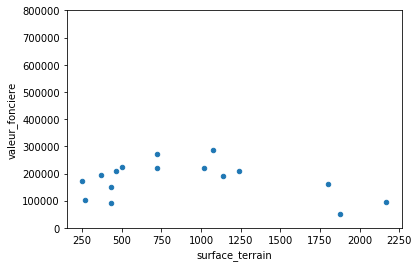

In [24]:
#scatter plot surface_terrain/valeur_fonciere
var = 'surface_terrain'
data = pd.concat([df_train['valeur_fonciere'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='valeur_fonciere', ylim=(0,800000));

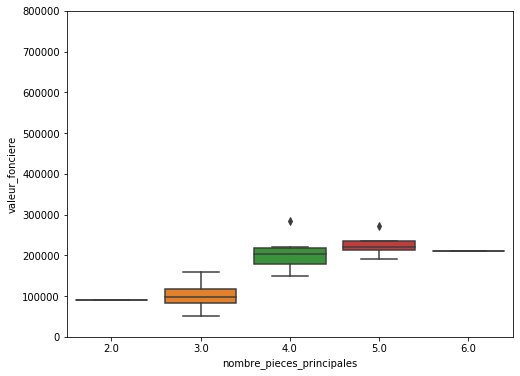

In [25]:
#box plot nombre_pieces_principales/valeur_fonciere
var = 'nombre_pieces_principales'
data = pd.concat([df_train['valeur_fonciere'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="valeur_fonciere", data=data)
fig.axis(ymin=0, ymax=800000);

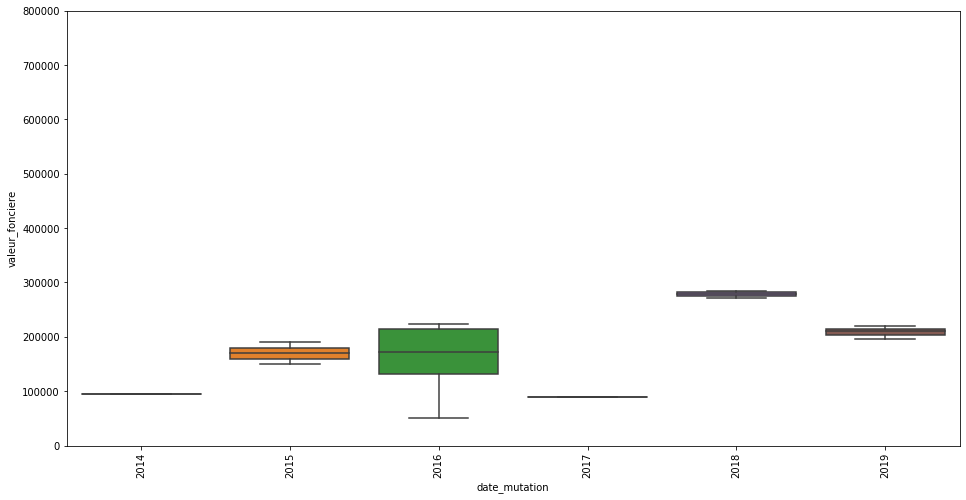

In [26]:
var = 'date_mutation'
data = pd.concat([df_train['valeur_fonciere'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="valeur_fonciere", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

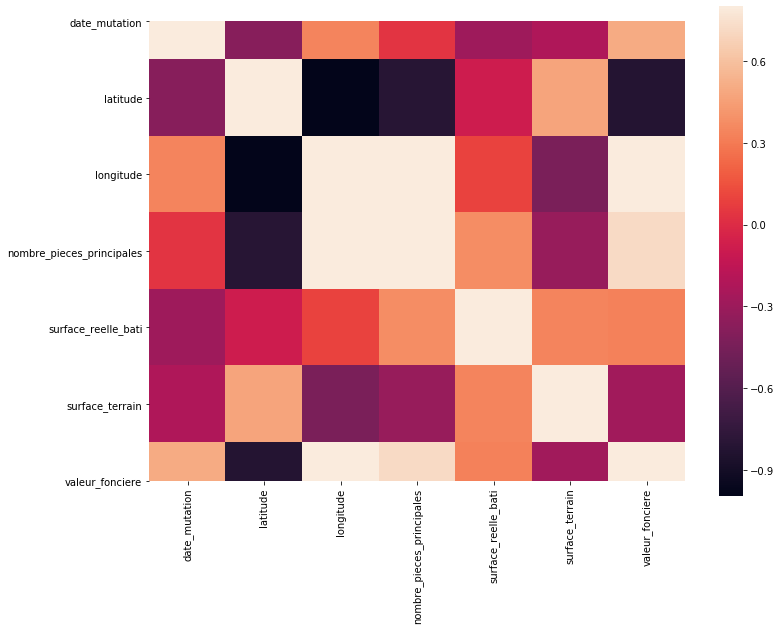

In [27]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

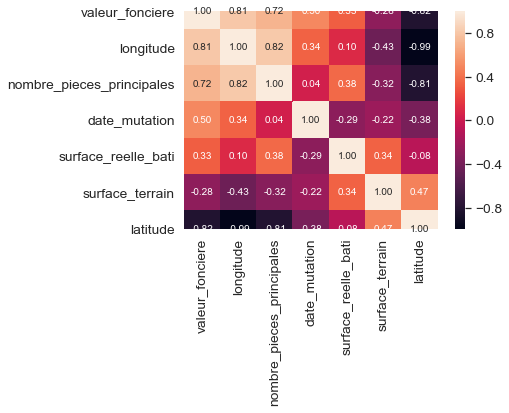

In [28]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'valeur_fonciere')['valeur_fonciere'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

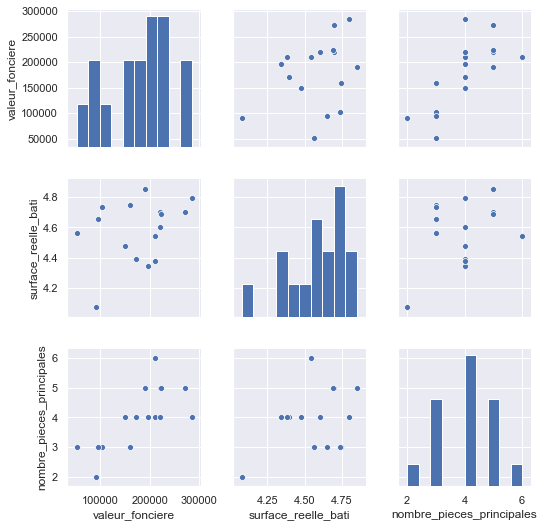

In [29]:
#scatterplot
sns.set()
cols = ['valeur_fonciere', 'surface_reelle_bati', 'nombre_pieces_principales', 'city']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

In [208]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['valeur_fonciere'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.58984285]
 [-1.37819282]
 [-1.24885113]
 [-1.13714695]
 [-1.12715236]
 [-1.06424527]
 [-1.04895943]
 [-1.04308026]
 [-0.96665108]
 [-0.96665108]]

outer range (high) of the distribution:
[[0.85589088]
 [0.97347423]
 [0.97347423]
 [1.06166175]
 [1.14984926]
 [1.35562013]
 [1.61841892]
 [3.20167876]
 [3.20167876]
 [3.56030798]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


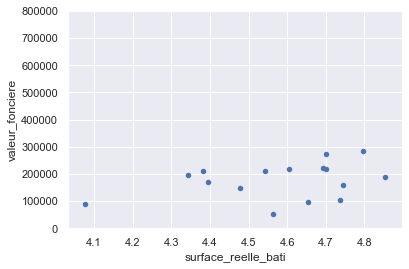

In [30]:
#bivariate analysis saleprice/grlivarea
var = 'surface_reelle_bati'
data = pd.concat([df_train['valeur_fonciere'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='valeur_fonciere', ylim=(0,800000));

In [31]:
#deleting points
df_train.sort_values(by = 'surface_reelle_bati', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

KeyError: 'Id'

In [32]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

KeyError: 'SalePrice'

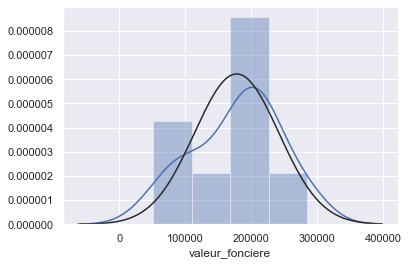

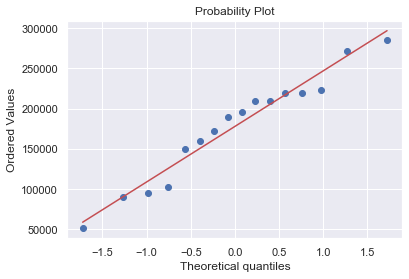

In [33]:
#histogram and normal probability plot
sns.distplot(df_train['valeur_fonciere'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['valeur_fonciere'], plot=plt)

In [34]:
#applying log transformation
df_train['valeur_fonciere'] = np.log(df_train['valeur_fonciere'])

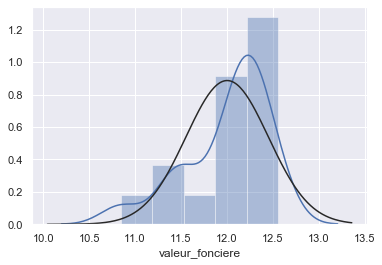

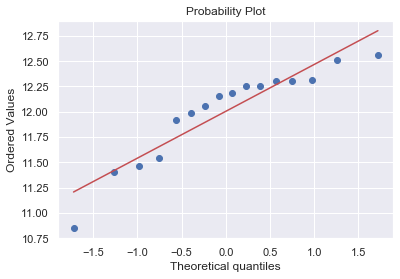

In [35]:
#transformed histogram and normal probability plot
sns.distplot(df_train['valeur_fonciere'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['valeur_fonciere'], plot=plt)

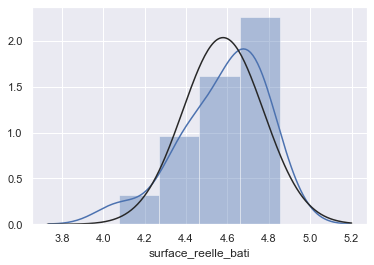

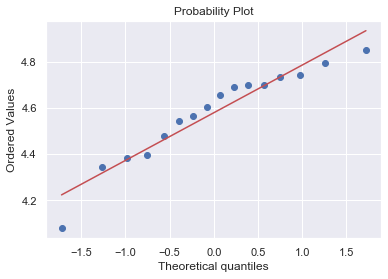

In [36]:
#histogram and normal probability plot
sns.distplot(df_train['surface_reelle_bati'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['surface_reelle_bati'], plot=plt)

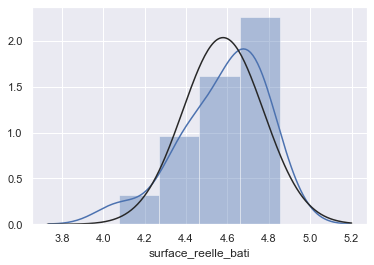

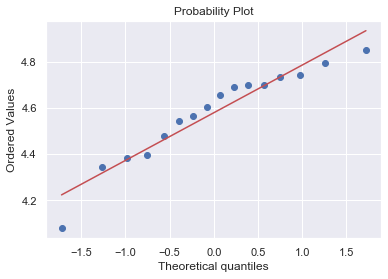

In [37]:
#histogram and normal probability plot
sns.distplot(df_train['surface_reelle_bati'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['surface_reelle_bati'], plot=plt)

In [38]:
#convert categorical variable into dummy
df_train = pd.get_dummies(df_train)

In [39]:
from sklearn.preprocessing import StandardScaler # Used for scaling of data
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import metrics
from tensorflow.keras import backend as K
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras import optimizers


In [55]:
df_train

,date_mutation,latitude,longitude,nombre_pieces_principales,surface_reelle_bati,surface_terrain,valeur_fonciere,city_Abbaretz,city_Aigrefeuille-sur-Maine,type_local_Maison
id,,,,,,,,,,
0,2016,47.535743,-1.534179,3.0,4.744932,1803.0,11.982929,1,0,1
1,2018,47.080574,-1.405583,4.0,4.795791,1076.0,12.559718,0,1,1
3,2016,47.082339,-1.405310,6.0,4.543295,465.0,12.254863,0,1,1
13,2017,47.547748,-1.532885,2.0,4.077537,435.0,11.407565,1,0,1
24,2015,47.081358,-1.409346,4.0,4.477337,432.0,11.918391,0,1,1
25,2016,47.083248,-1.405506,5.0,4.700480,722.0,12.301383,0,1,1
26,2016,47.082477,-1.405356,4.0,4.394449,249.0,12.055250,0,1,1
43,2018,47.083248,-1.405506,5.0,4.700480,722.0,12.513557,0,1,1
47,2016,47.533210,-1.527500,3.0,4.736198,270.0,11.537618,1,0,1


In [41]:
# cols = ['city', 'latitude', 'longitude', 'nombre_pieces_principales', 'surface_reelle_bati', 'surface_terrain', 'type_local', 'valeur_fonciere']

# df_train = df_train[cols]
# Create dummy values
# df_train = pd.get_dummies(df_train)
#filling NA's with the mean of the column:
# df_train = df_train.fillna(df_train.mean())
# Always standard scale the data before using NN
scale = StandardScaler()
X_train = df_train.drop('valeur_fonciere', axis=1)
X_train = scale.fit_transform(X_train)
# Y is just the 'SalePrice' column
y = df_train['valeur_fonciere'].values
seed = 7
np.random.seed(seed)
# split into 67% for train and 33% for test
X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size=0.33, random_state=seed)


In [42]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(30, activation='relu'))
    # model.add(Dropout(0.25))
    model.add(Dense(40, activation='relu'))
    # model.add(Dropout(0.25))
    # model.add(Dense(50, activation='relu'))
    # model.add(Dropout(0.25))
    # model.add(Dense(60, activation='relu'))
    model.add(Dense(1))
    # Compile model
    optimizer = optimizers.Adam(lr=0.00005, beta_1=0.09, beta_2=0.099, amsgrad=True)
    optimizer = optimizers.Adam(lr=0.0005, beta_1=0.009, beta_2=0.0099, amsgrad=True)
    optimizer = optimizers.Adam(lr=0.0005)
    optimizer = optimizers.SGD(lr=0.003, decay=1e-6, momentum=0.5, nesterov=True, clipnorm=1)
    optimizer = optimizers.Adam()
#     optimizer = optimizers.SGD(lr=0.003, clipnorm=1)

    model.compile(optimizer = optimizer, loss = 'mean_squared_error', 
              metrics =[metrics.mae])
    return model

In [43]:
model = create_model()
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_2 (Dense)              (None, 40)                1240      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 41        
Total params: 1,711
Trainable params: 1,711
Non-trainable params: 0
_________________________________________________________________


In [44]:
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=150, batch_size=32)


Train on 10 samples, validate on 6 samples
Epoch 1/150
10/10 [==============================] - 1s 145ms/sample - loss: 146.8599 - mean_absolute_error: 12.1120 - val_loss: 141.6067 - val_mean_absolute_error: 11.8874
Epoch 2/150
10/10 [==============================] - 0s 8ms/sample - loss: 145.9814 - mean_absolute_error: 12.0756 - val_loss: 140.8288 - val_mean_absolute_error: 11.8552
Epoch 3/150
10/10 [==============================] - 0s 7ms/sample - loss: 145.1298 - mean_absolute_error: 12.0403 - val_loss: 140.0523 - val_mean_absolute_error: 11.8229
Epoch 4/150
10/10 [==============================] - 0s 7ms/sample - loss: 144.2860 - mean_absolute_error: 12.0052 - val_loss: 139.2983 - val_mean_absolute_error: 11.7914
Epoch 5/150
10/10 [==============================] - 0s 8ms/sample - loss: 143.4654 - mean_absolute_error: 11.9709 - val_loss: 138.5445 - val_mean_absolute_error: 11.7599
Epoch 6/150
10/10 [==============================] - 0s 9ms/sample - loss: 142.6644 - mean_absolute_

Epoch 49/150
10/10 [==============================] - 0s 11ms/sample - loss: 91.4972 - mean_absolute_error: 9.5411 - val_loss: 91.7522 - val_mean_absolute_error: 9.5169
Epoch 50/150
10/10 [==============================] - 0s 11ms/sample - loss: 89.4357 - mean_absolute_error: 9.4311 - val_loss: 89.9747 - val_mean_absolute_error: 9.4169
Epoch 51/150
10/10 [==============================] - 0s 16ms/sample - loss: 87.3314 - mean_absolute_error: 9.3173 - val_loss: 88.1665 - val_mean_absolute_error: 9.3136
Epoch 52/150
10/10 [==============================] - 0s 13ms/sample - loss: 85.1761 - mean_absolute_error: 9.1993 - val_loss: 86.3355 - val_mean_absolute_error: 9.2074
Epoch 53/150
10/10 [==============================] - 0s 13ms/sample - loss: 82.9669 - mean_absolute_error: 9.0766 - val_loss: 84.4736 - val_mean_absolute_error: 9.0974
Epoch 54/150
10/10 [==============================] - 0s 13ms/sample - loss: 80.7070 - mean_absolute_error: 8.9492 - val_loss: 82.5787 - val_mean_absolute_

Epoch 98/150
10/10 [==============================] - 0s 9ms/sample - loss: 4.8164 - mean_absolute_error: 1.7838 - val_loss: 30.5821 - val_mean_absolute_error: 4.9804
Epoch 99/150
10/10 [==============================] - 0s 9ms/sample - loss: 4.7653 - mean_absolute_error: 1.8230 - val_loss: 30.5395 - val_mean_absolute_error: 4.9647
Epoch 100/150
10/10 [==============================] - 0s 9ms/sample - loss: 4.7163 - mean_absolute_error: 1.8519 - val_loss: 30.4487 - val_mean_absolute_error: 4.9732
Epoch 101/150
10/10 [==============================] - 0s 7ms/sample - loss: 4.6605 - mean_absolute_error: 1.8705 - val_loss: 30.3056 - val_mean_absolute_error: 4.9778
Epoch 102/150
10/10 [==============================] - 0s 7ms/sample - loss: 4.5917 - mean_absolute_error: 1.8791 - val_loss: 30.1086 - val_mean_absolute_error: 4.9745
Epoch 103/150
10/10 [==============================] - 0s 6ms/sample - loss: 4.5065 - mean_absolute_error: 1.8783 - val_loss: 29.8588 - val_mean_absolute_error: 4

Epoch 147/150
10/10 [==============================] - 0s 8ms/sample - loss: 0.8148 - mean_absolute_error: 0.7569 - val_loss: 16.2270 - val_mean_absolute_error: 3.5553
Epoch 148/150
10/10 [==============================] - 0s 6ms/sample - loss: 0.7909 - mean_absolute_error: 0.7474 - val_loss: 16.1003 - val_mean_absolute_error: 3.5424
Epoch 149/150
10/10 [==============================] - 0s 5ms/sample - loss: 0.7683 - mean_absolute_error: 0.7378 - val_loss: 15.9780 - val_mean_absolute_error: 3.5296
Epoch 150/150
10/10 [==============================] - 0s 9ms/sample - loss: 0.7471 - mean_absolute_error: 0.7284 - val_loss: 15.8596 - val_mean_absolute_error: 3.5170


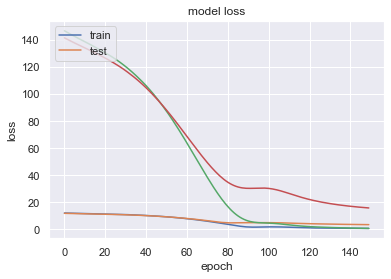

In [45]:
# summarize history for accuracy
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.show()


In [140]:
df_test = pd.read_csv('./data/etalab/test.csv')
cols = ['city', 'latitude', 'longitude', 'nombre_pieces_principales', 'surface_reelle_bati', 'surface_terrain', 'type_local']
# cols = ['city', 'nombre_pieces_principales', 'surface_reelle_bati', 'surface_terrain', 'type_local']
# id_col = df_test['id'].values.tolist()
df_test['surface_reelle_bati'] = np.log(df_test['surface_reelle_bati'])
df_test = pd.get_dummies(df_test)
df_test = df_test.fillna(df_test.mean())


In [141]:
#dealing with missing data
df_test = df_test.dropna(subset=['nombre_pieces_principales', 'surface_reelle_bati'])
df_test = df_test.dropna(subset=['longitude', 'latitude'])
# df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index)
df_test = df_test.drop(df_test.loc[df_test['nombre_pieces_principales'] == 0].index)
df_test.isnull().sum().max() #just checking that there's no missing data missing...
id_col = df_test['id'].values.tolist()
df_test = df_test.drop('id', axis = 1)
df_test = df_test.drop('type_local_Dépendance', axis = 1)
df_test = df_test.drop('type_local_Local industriel. commercial ou assimilé', axis = 1)

In [142]:
df_test.head()

,date_mutation,latitude,longitude,nombre_pieces_principales,surface_reelle_bati,surface_terrain,city_Abbaretz,city_Aigrefeuille-sur-Maine,type_local_Maison
0,2018,47.081433,-1.409099,4.0,4.430817,384.0,0,1,1
1,2018,47.179425,-1.415075,4.0,4.727388,258.0,1,0,1
2,2018,47.179425,-1.415075,3.0,4.043051,723.0,1,0,1
3,2014,47.179425,-1.415075,2.0,3.912023,335.0,1,0,1
4,2019,47.179425,-1.415075,2.0,4.532599,777.0,1,0,1


In [143]:
df_test.shape

(28, 9)

In [144]:
# X_test = df_test[cols].values
X_test = df_test.values
# Always standard scale the data before using NN
scale = StandardScaler()
X_test = scale.fit_transform(X_test)

In [148]:
prediction = model.predict(X_test)
# print(prediction)

In [150]:
submission = pd.DataFrame()
submission['id'] = id_col
submission['valeur_fonciere'] = prediction
submission['valeur_fonciere'] = np.exp(prediction)

submission.to_csv('./data/etalab/submission4.csv', index=False)